In [3]:
import pickle
from functools import partial
from os import listdir
from os.path import isfile, join

import numpy as np
import pandas as pd
import scipy
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

from common import CityResult
from file_name_generator import generate_new_name


Загрузка данных

In [15]:
mypath = './data/full_synnt_2000_full_alpha'

In [16]:
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

r : dict[str:CityResult]= {}
for name in onlyfiles:
    if 'ASHA' in name:
        continue
    with open(join(mypath, name), 'rb') as f:
        r[name] = pickle.load(f)
        f.close()

In [1]:
mypath = './data/data/data_csv'

In [14]:
import csv

onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
for name in onlyfiles:
    if 'mistakes_' in name:
        continue
    with open(join(mypath, name), 'r') as f:
        csv_reader = csv.DictReader(f)
        data = [row for row in csv_reader]
        print(data)
    break

[{'error': '29.766162635828042', 'time_centr': '1.6778745651245117', 'times': '0.012353897094726562', 'ks': '0.013', 'dijkstra_time': '0.023403406143188477'}, {'error': '40.83190341523213', 'time_centr': '1.316725254058838', 'times': '0.009511709213256836', 'ks': '0.021', 'dijkstra_time': '0.023403406143188477'}, {'error': '35.73643022345612', 'time_centr': '1.3021488189697266', 'times': '0.007609128952026367', 'ks': '0.041', 'dijkstra_time': '0.023403406143188477'}, {'error': '34.662566144902705', 'time_centr': '1.6212952136993408', 'times': '0.0076024532318115234', 'ks': '0.07', 'dijkstra_time': '0.023403406143188477'}, {'error': '28.617025211976998', 'time_centr': '2.3559563159942627', 'times': '0.006618022918701172', 'ks': '0.126', 'dijkstra_time': '0.023403406143188477'}, {'error': '34.6789624635136', 'time_centr': '3.4995357990264893', 'times': '0.007643461227416992', 'ks': '0.218', 'dijkstra_time': '0.023403406143188477'}, {'error': '38.388341532059776', 'time_centr': '5.1735620

Обработка данных

In [4]:
d = []
a = []

Rand0_2000_0.0066.pkl
[2.3648912895152376, 2.6020793588265505, 1.5490432777993597, 1.2258376311197305, 1.1107717799070107, 1.149378915655516, 1.0301236298459575, 0.9281520982992553, 0.9215052173841909, 1.0296083014557775, 0.9952178307138577, 0.8500326161640076, 0.8288729847886164, 0.8369502758795181, 0.8831468429161524, 0.8138879642459945, 0.8265916245054622, 0.7540808569904277, 0.6861103802757326, 0.752371588124992, 0.7362109696033642, 0.6708300969923936, 0.7124588597941333, 0.7425389842047995]
0.006566783391695848
5
5


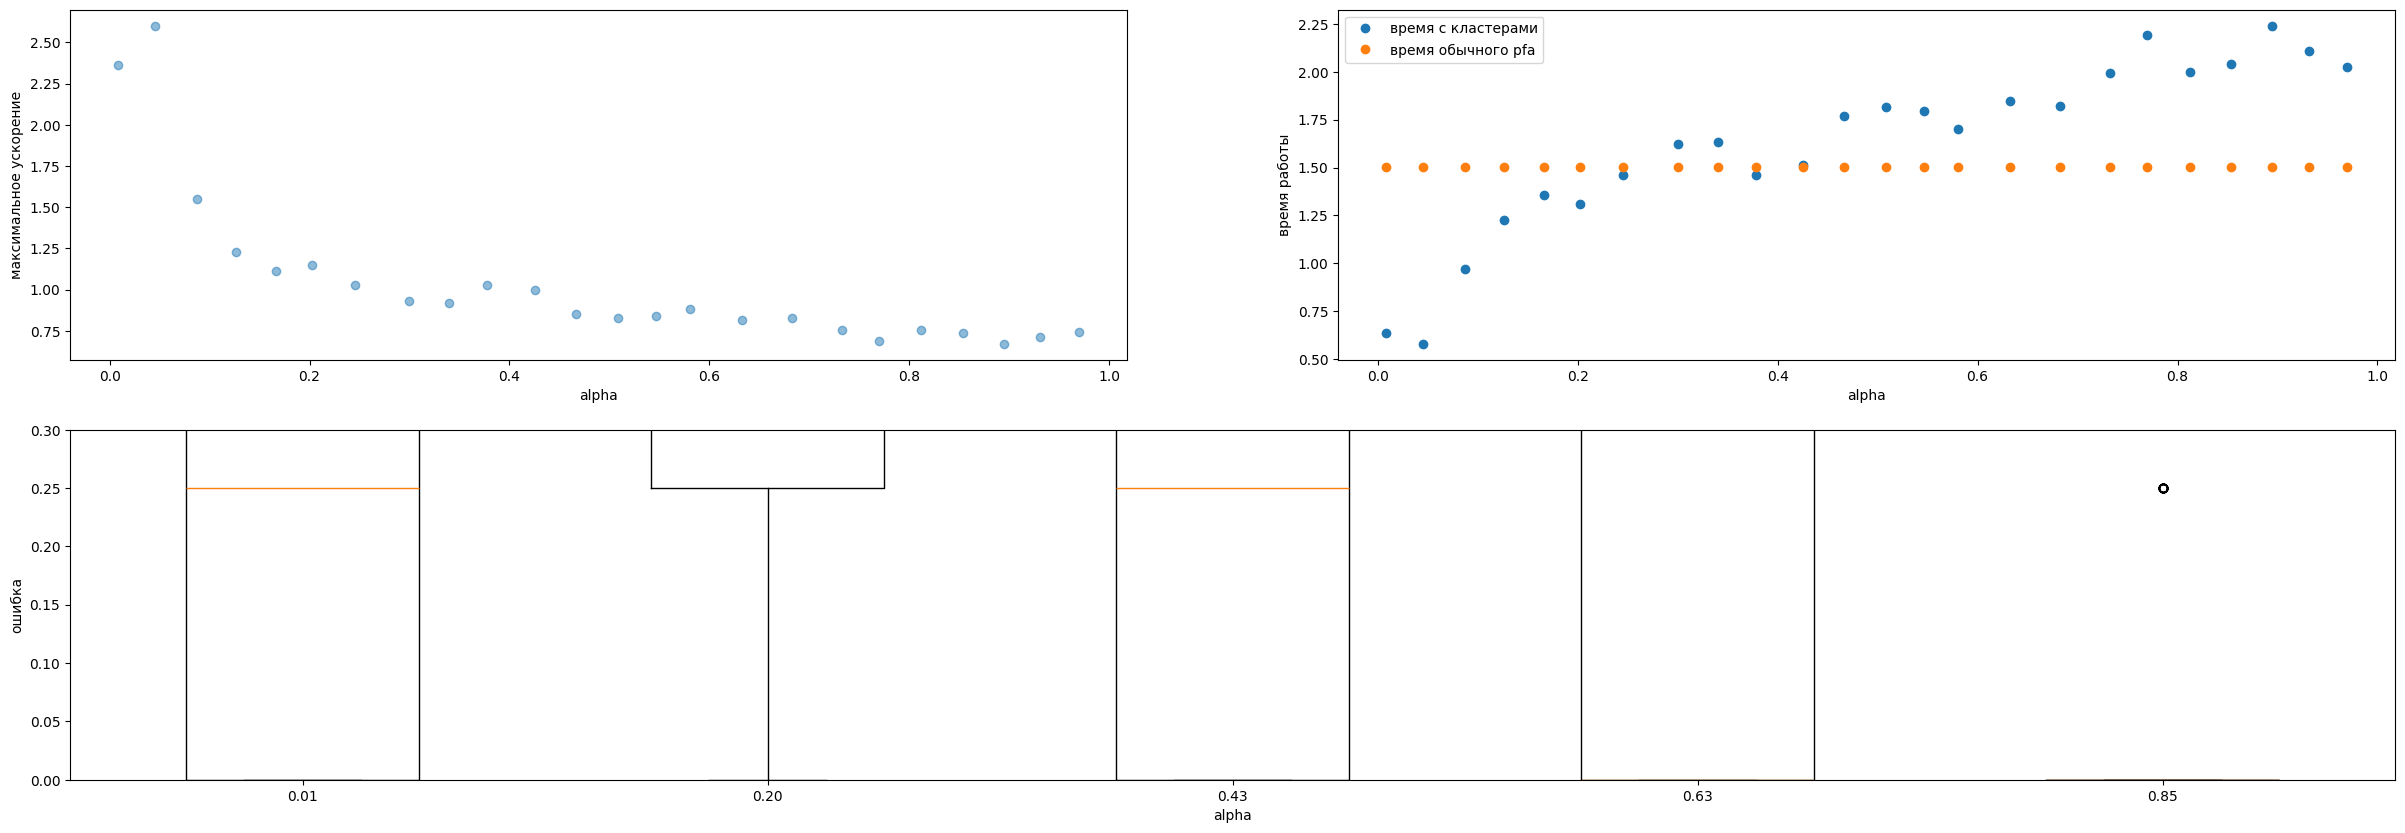

Rand0_2000_0.003.pkl
[2.8772394564058197, 1.9652313610578178, 1.5782973874635842, 1.4558485234080716, 1.3935315713431766, 1.3112131339950905, 1.262809987264499, 1.171837482632716, 1.0468219946115165, 1.0712498591411543, 1.0594890283590128, 0.90037849359371, 0.8857126847469248, 0.8703269297622467, 0.7832030009006199, 0.821365677277579, 0.7941589878820741, 0.8035113361604711, 0.749925067383539, 0.7438653131594167, 0.7850825475143423, 0.6335260658903611, 0.6719311891827373, 0.6032626045549726]
0.0030165082541270634
5
5


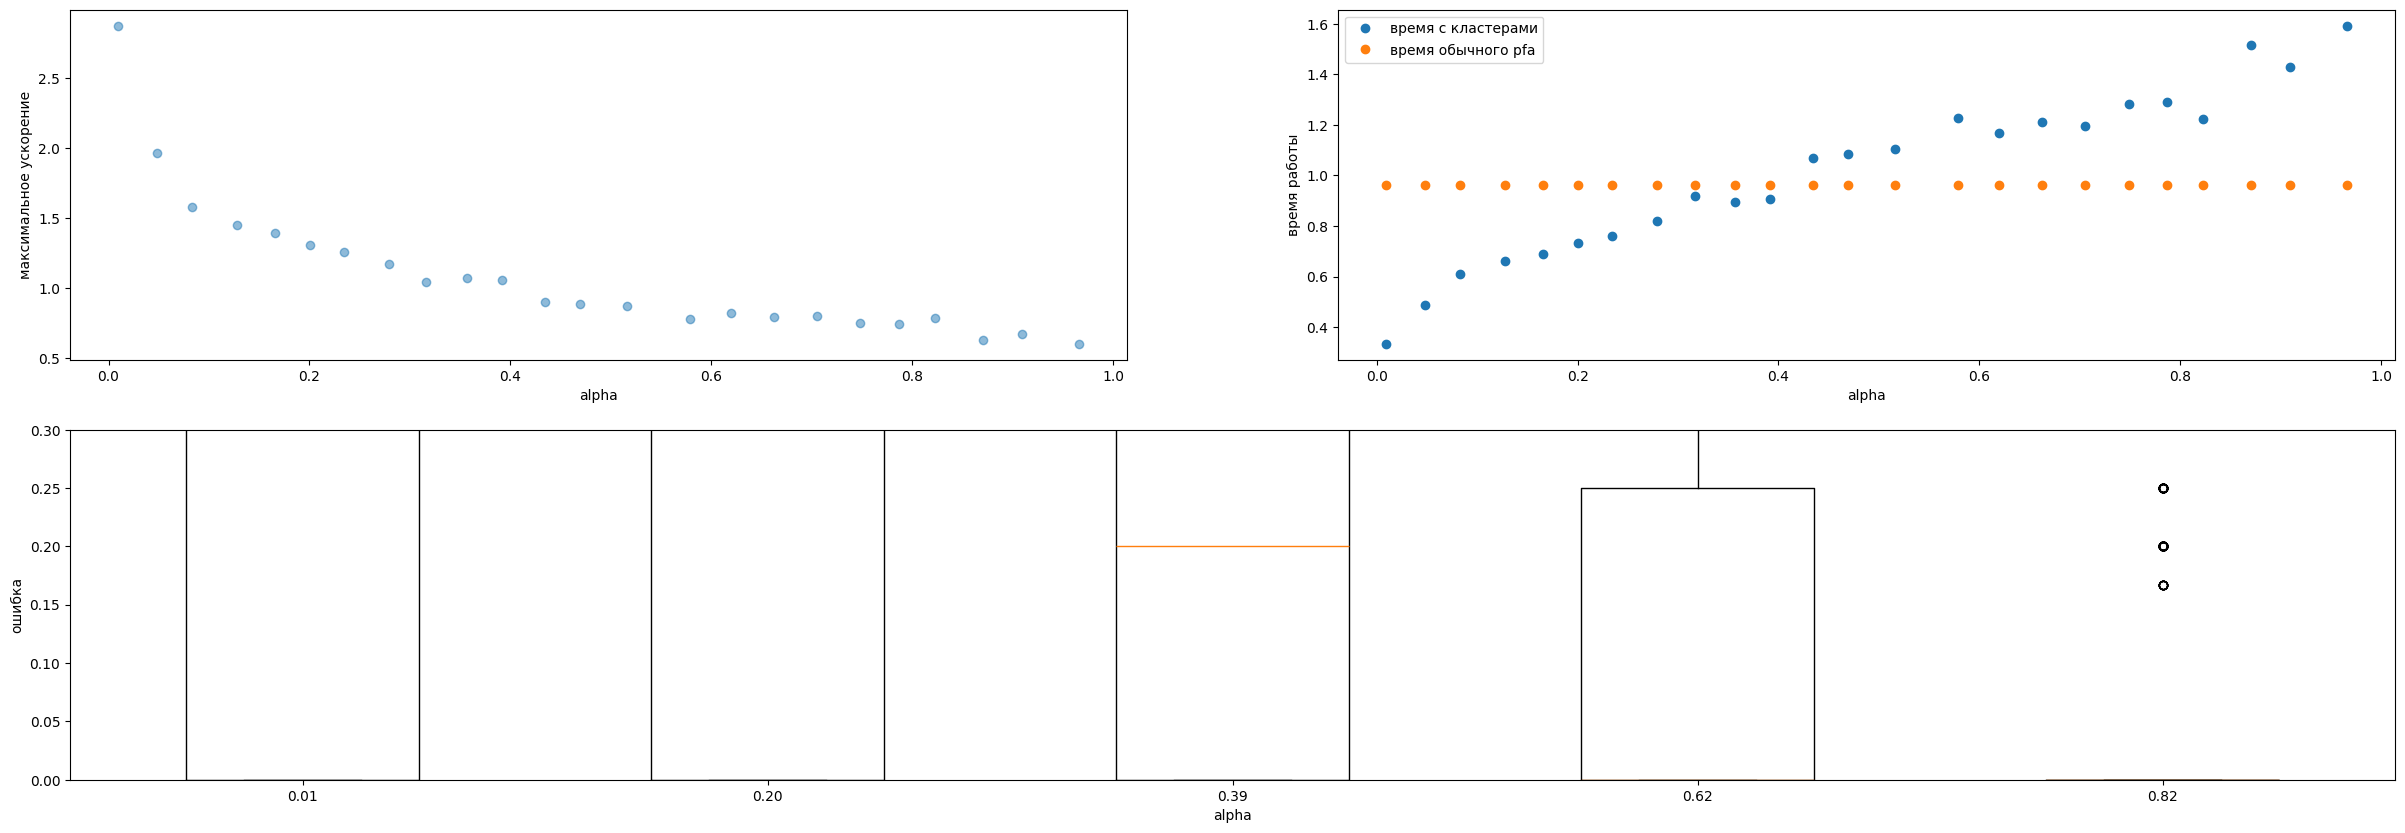

Rand0_2000_0.0189.pkl
[2.946333912183586, 7.622827892367576, 4.15961133259293, 2.5566053252666463, 2.1013623828126535, 2.0472617029889335, 1.9867585587981513, 2.0171057481908834, 2.1111517433803613, 1.8284636911864394, 2.1556462068399376, 1.9951426470714324, 2.0077063354004583, 2.1384249834355225, 1.9815220732645242, 2.148006240173185, 1.8643101158512856, 1.8694282928008832, 1.8482462233702512, 1.9089099813926462, 1.8752763090544151, 1.842384624387668]
0.018892946473236617
5
5


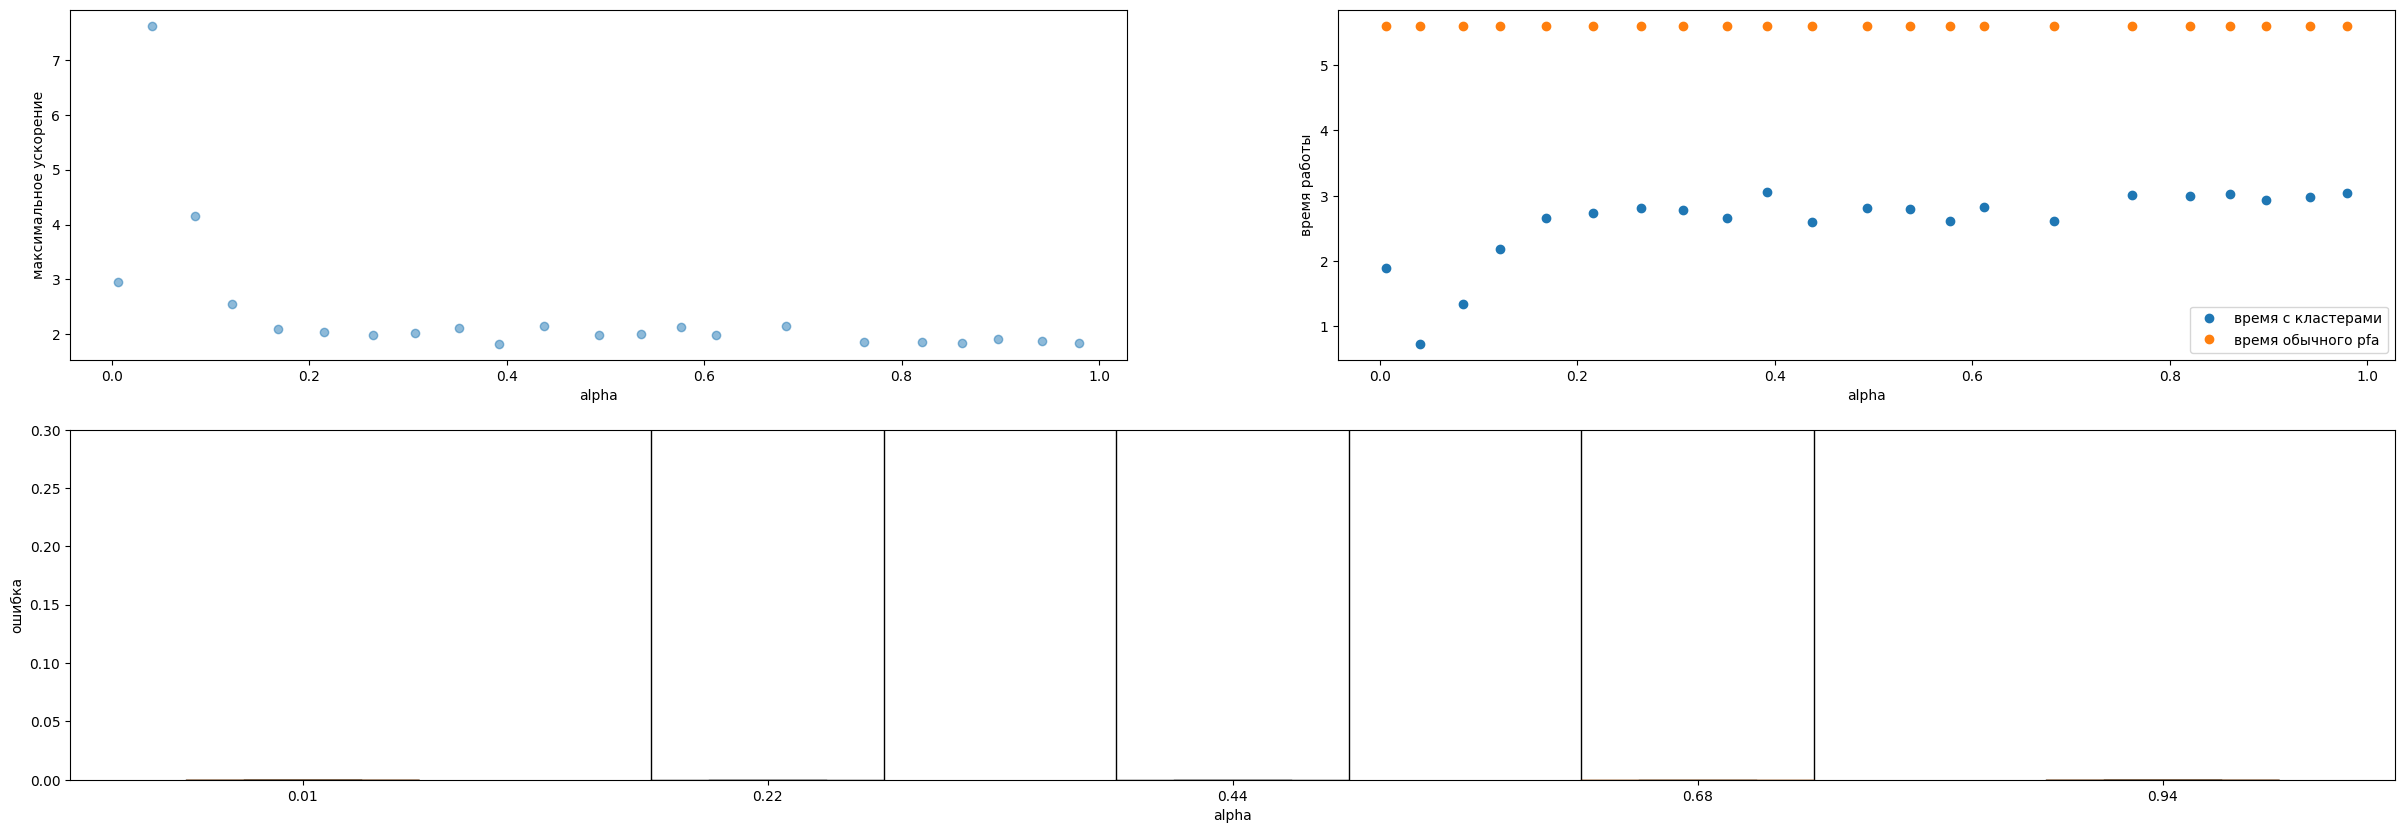

Rand0_2000_0.0145.pkl
[1.3325668644334676, 2.8119002682127863, 1.6513591874119615, 1.164530430294977, 1.0746167018949593, 1.1923877959246936, 1.0636050366656469, 1.1214819996429035, 1.0582038168898016, 1.2256005351014947, 1.2171813755523384, 1.2235566064400547, 1.183770727289438, 1.1637223784214008, 1.0943788627274866, 1.1306730025473855, 1.0457467064954893, 1.0494066561656108, 1.0236514347555974, 1.0553511391923525, 0.988841383573547, 1.0093055190887026, 1.0362045027900064]
0.014476738369184592
5
5


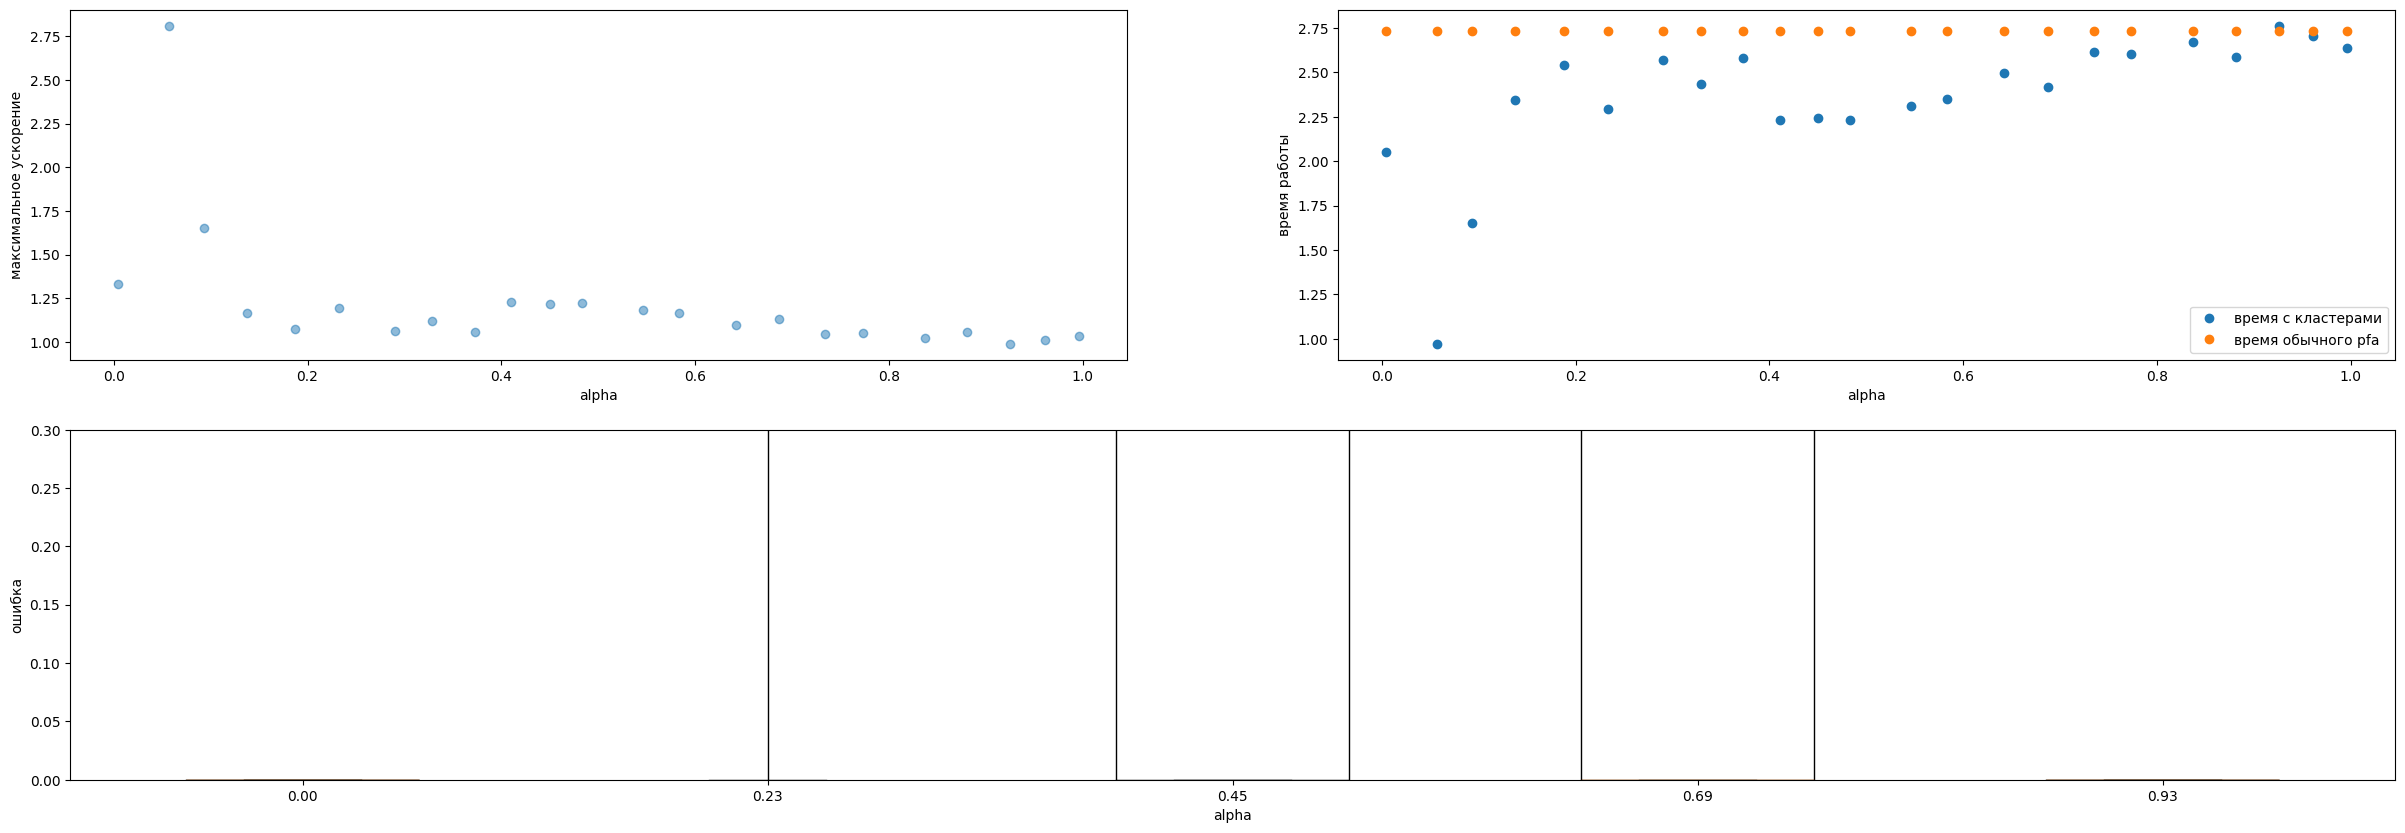

Rand0_2000_0.0086.pkl
[1.3723744137780056, 3.455922680054516, 1.4138002874475983, 1.064985008840435, 1.094325233672974, 1.2575070041883867, 1.1381687616529144, 1.0302745560454343, 0.927034825418369, 0.9494713296302607, 1.0238758027950299, 0.9965650959751433, 0.9195922253448275, 0.8241012399372049, 0.8561552370262417, 0.8462058665907979, 0.8863437199793319, 0.8376400058805348, 0.8721229345963383, 0.8224599200188436, 0.8527585181318292, 0.7968240405176886, 0.7976404208099296, 0.7168167028790374]
0.00855727863931966
5
5


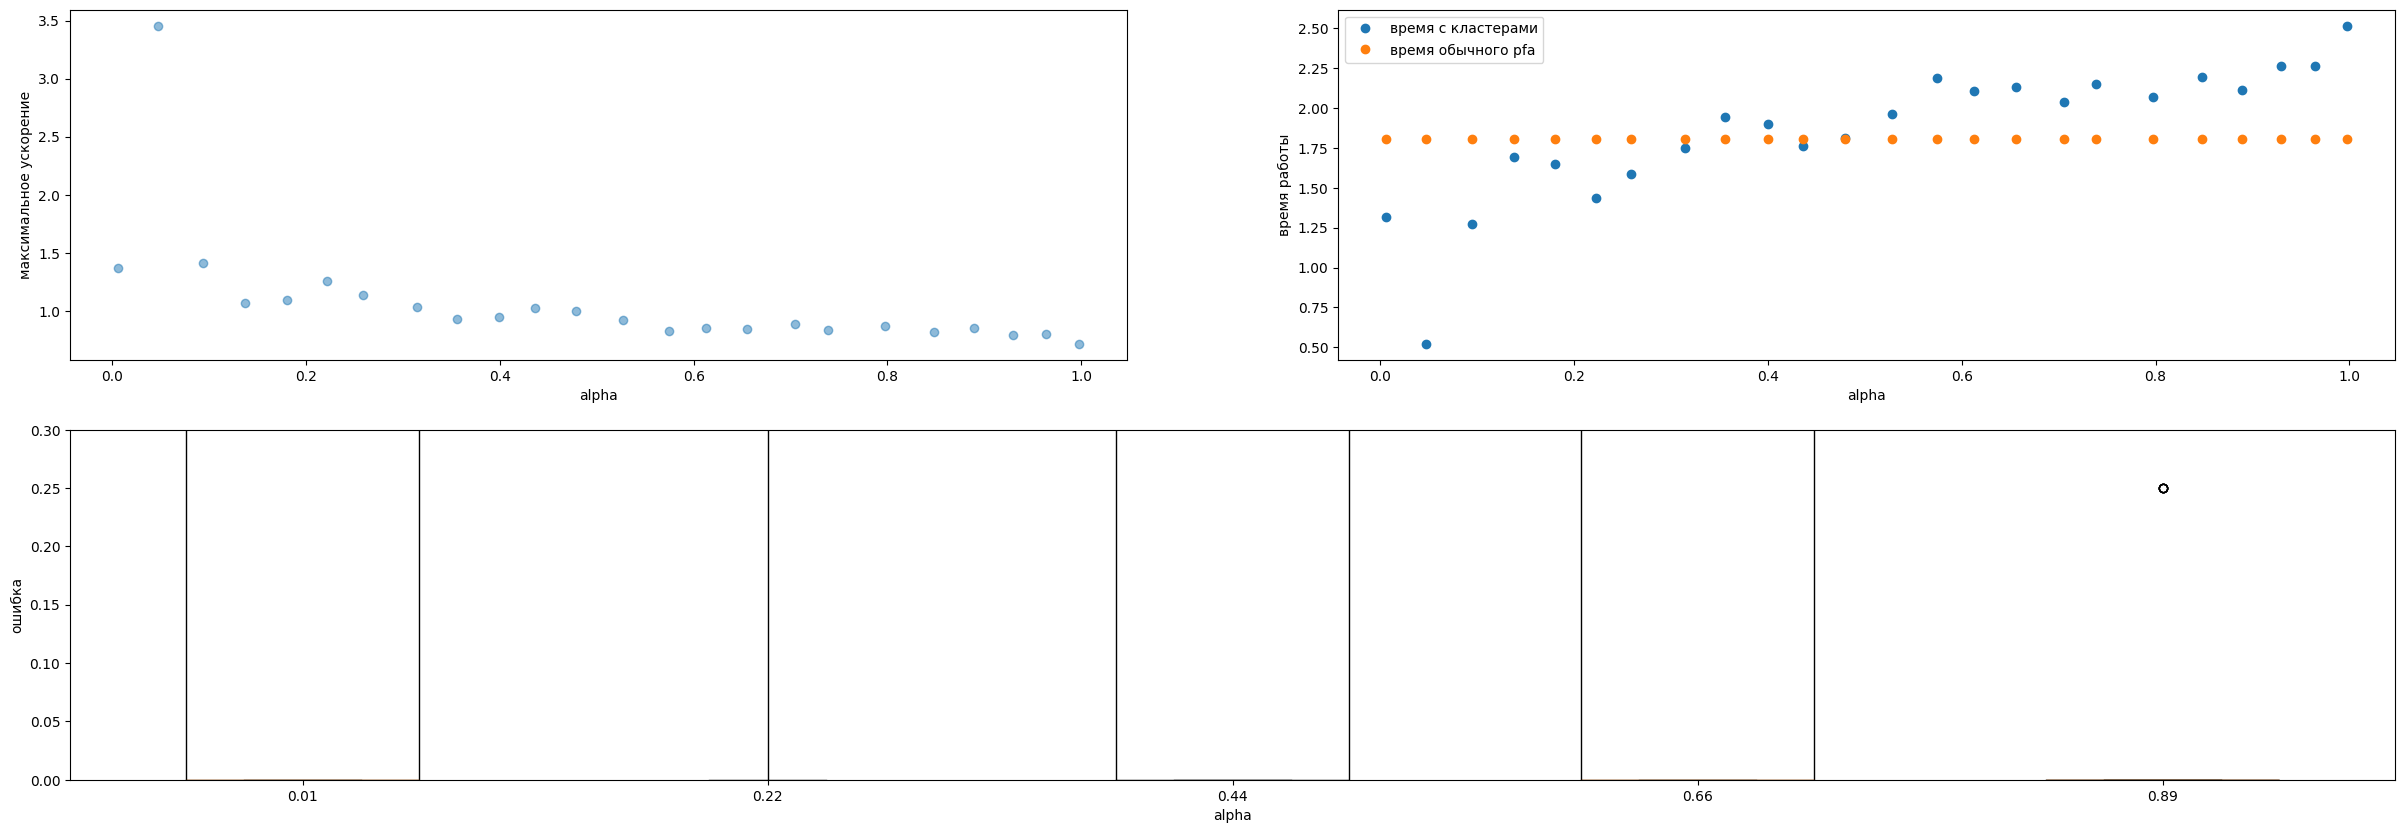

Rand0_2000_0.0038.pkl
[2.299180947260106, 2.04656974828867, 1.7003265223014141, 1.4556656826596233, 1.3501194131096088, 1.1556347275935361, 1.141253404888184, 1.1034264430246725, 0.9535738422784117, 1.0690748657967013, 0.855924266186166, 0.8934460561767721, 0.7820641066664134, 0.8493131628961486, 0.878847768197687, 0.7917938205530151, 0.7273392424181699, 0.727340619612489, 0.6947321635939141, 0.6985893861606534, 0.688206120164701, 0.7013453835883743, 0.6725860179674357, 0.668497396897973, 0.6523051490300913]
0.0038349174587293646
5
5


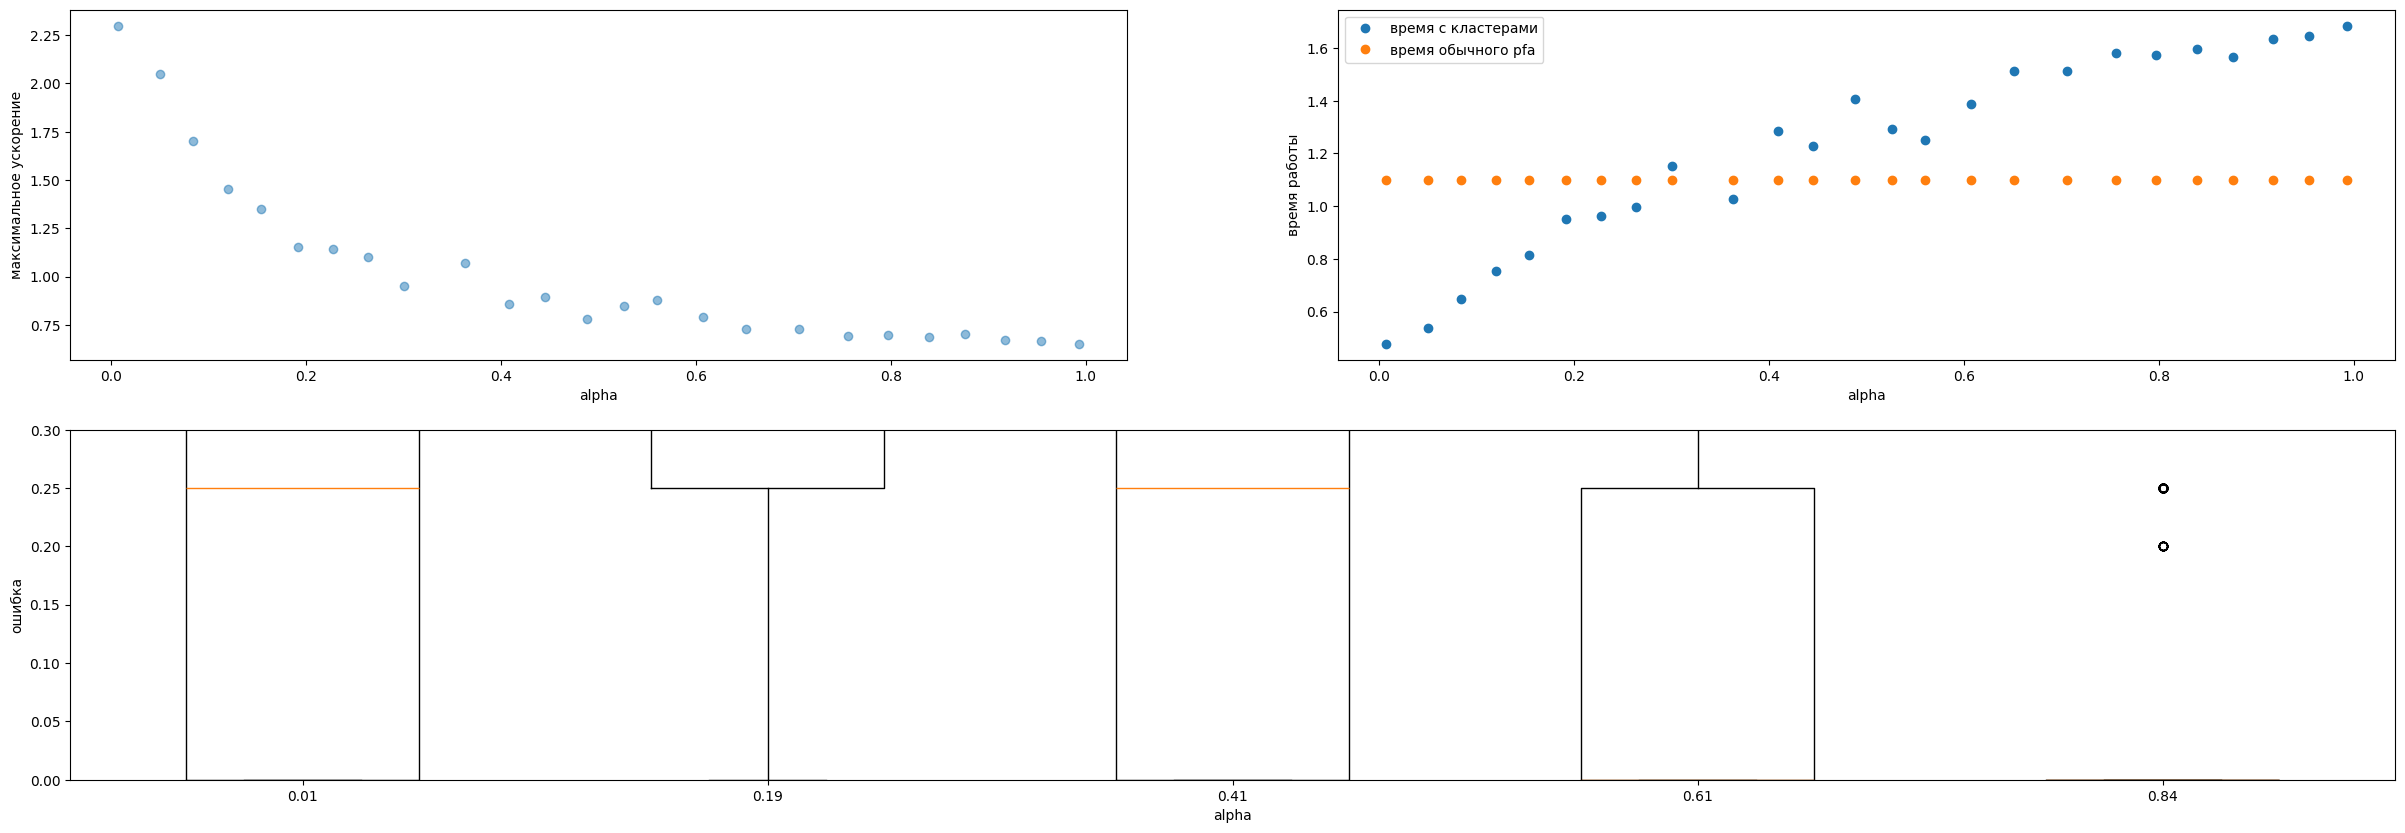

Rand0_2000_0.0112.pkl
[1.1925483167007431, 2.7856647980375184, 1.4757910281810163, 1.3840454585785553, 1.1885157267862656, 0.93749887900502, 1.001410794527614, 1.0284750386452295, 1.0515583738106515, 0.9751559442770463, 0.8870155300130907, 0.9781503362711575, 0.979570854792128, 1.0171435002706144, 0.8966411690406234, 0.9873042001353365, 0.8935300672682343, 0.8448436614741923, 0.8139504429662461, 0.7614258486609242, 0.8664256368787402]
0.011161080540270134
5
5


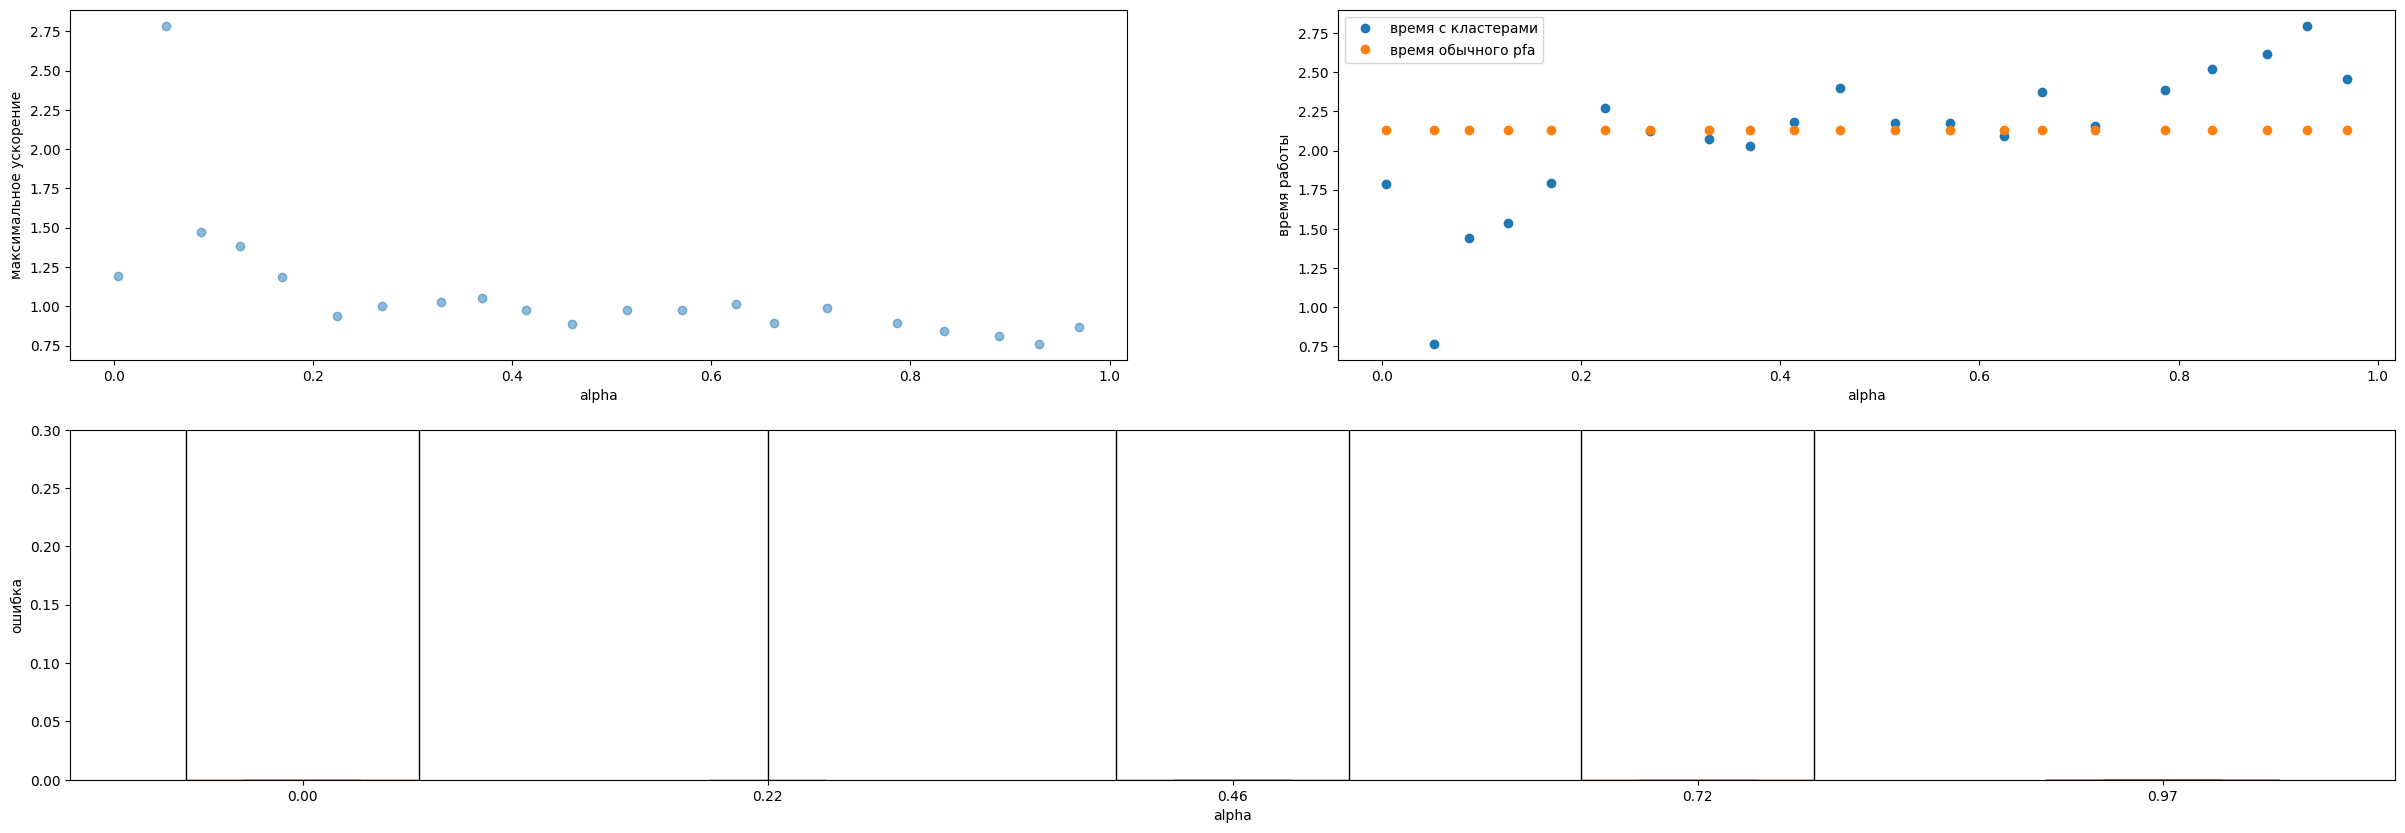

Rand0_2000_0.0243.pkl
[2.459106266534758, 11.974800910658805, 4.811407566961723, 2.6811769785414383, 2.948825458616464, 2.386917723826475, 2.401029799490626, 2.1335631128933996, 2.145728371481444, 2.2403628922231396, 2.307089159992547, 2.158505455467619, 2.1360978083343016, 2.2252093235702994, 2.2128220723730547, 2.08956483362369, 2.1736310656409583, 2.076158163234531, 2.045300270754314, 2.056298698818518, 2.0366693134520593, 2.0194498197590396]
0.024294647323661833
5
5


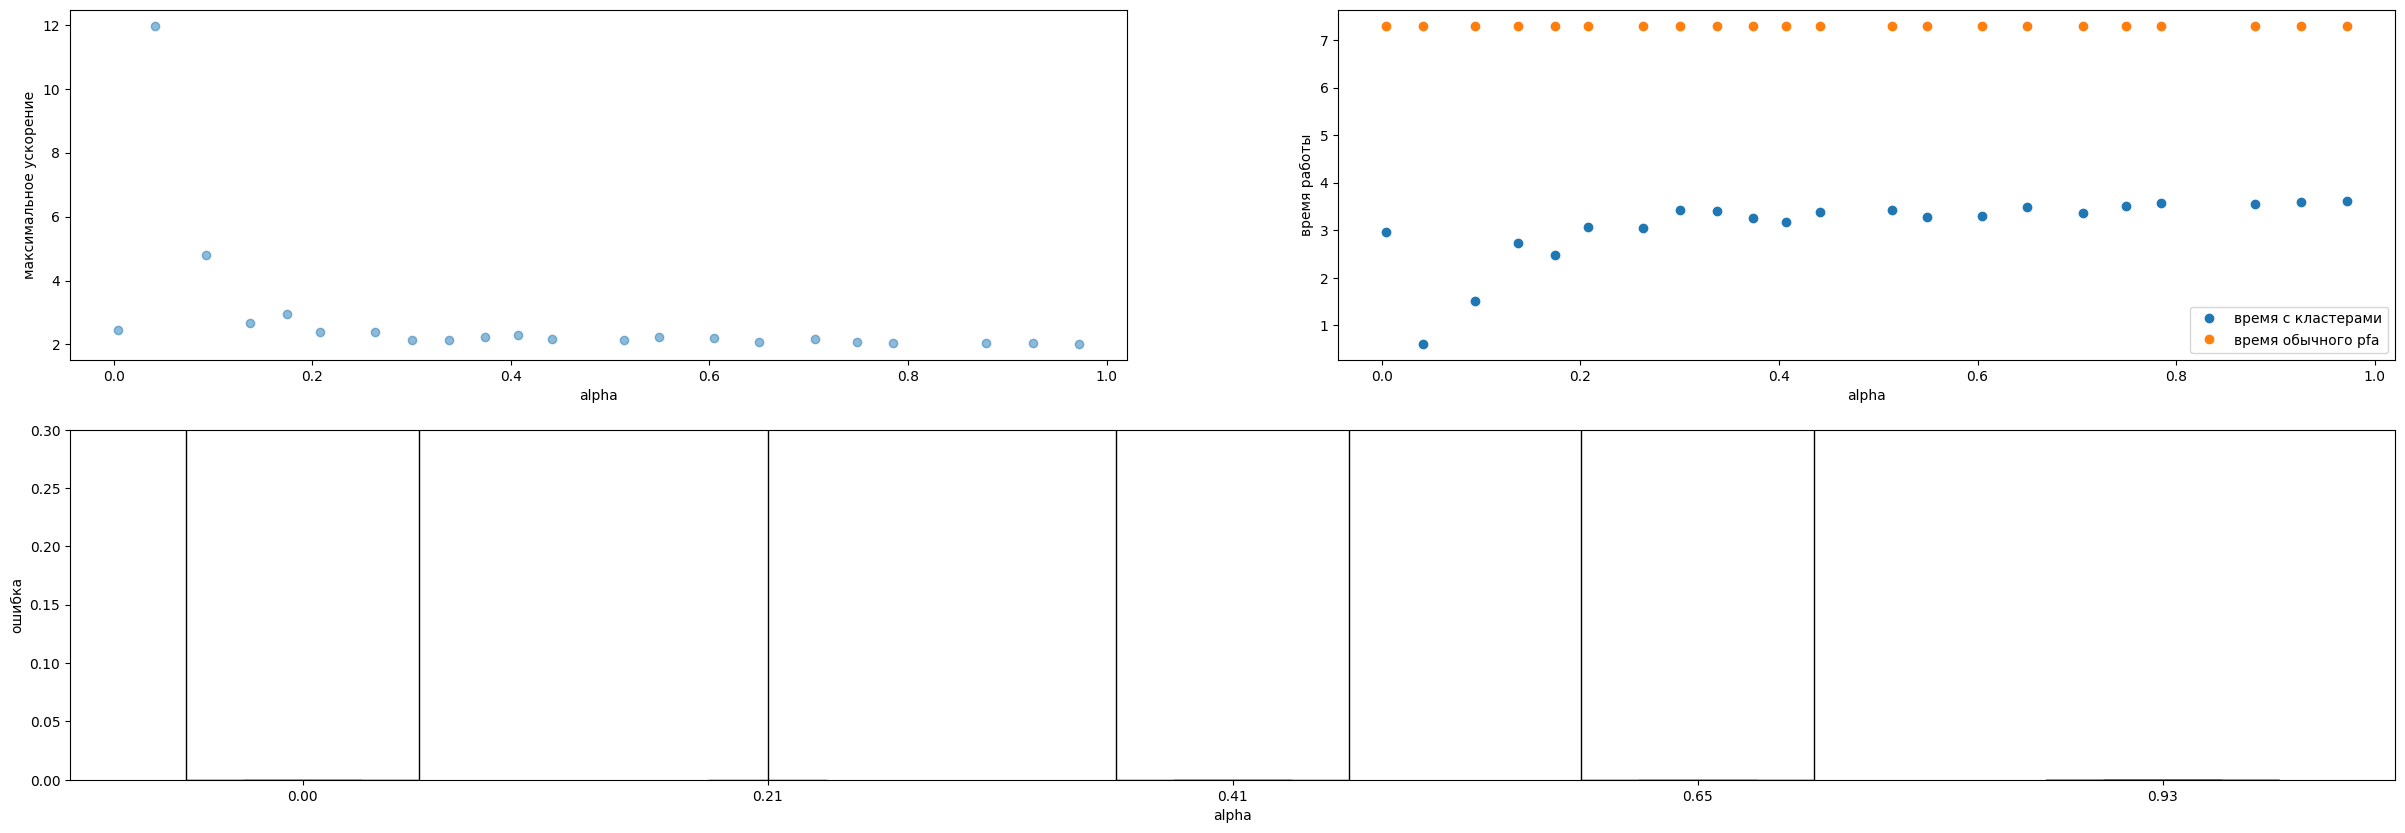

Rand0_2000_0.0023.pkl
[3.226040655181832, 2.053625819477186, 1.787832781618715, 1.4957849083454748, 1.4103020985164627, 1.3976475598013791, 1.2401323563339277, 1.289435097558126, 1.2835377820680192, 1.0616846524746282, 0.9858886698712536, 0.9746319197026104, 0.9386864957404898, 0.8283270509996029, 0.8291487040883071, 0.8514252347827009, 0.7668529871718094, 0.675205303741324, 0.6870307387003289, 0.6809863211068066, 0.641245912783781]
0.0023416708354177087
5
5


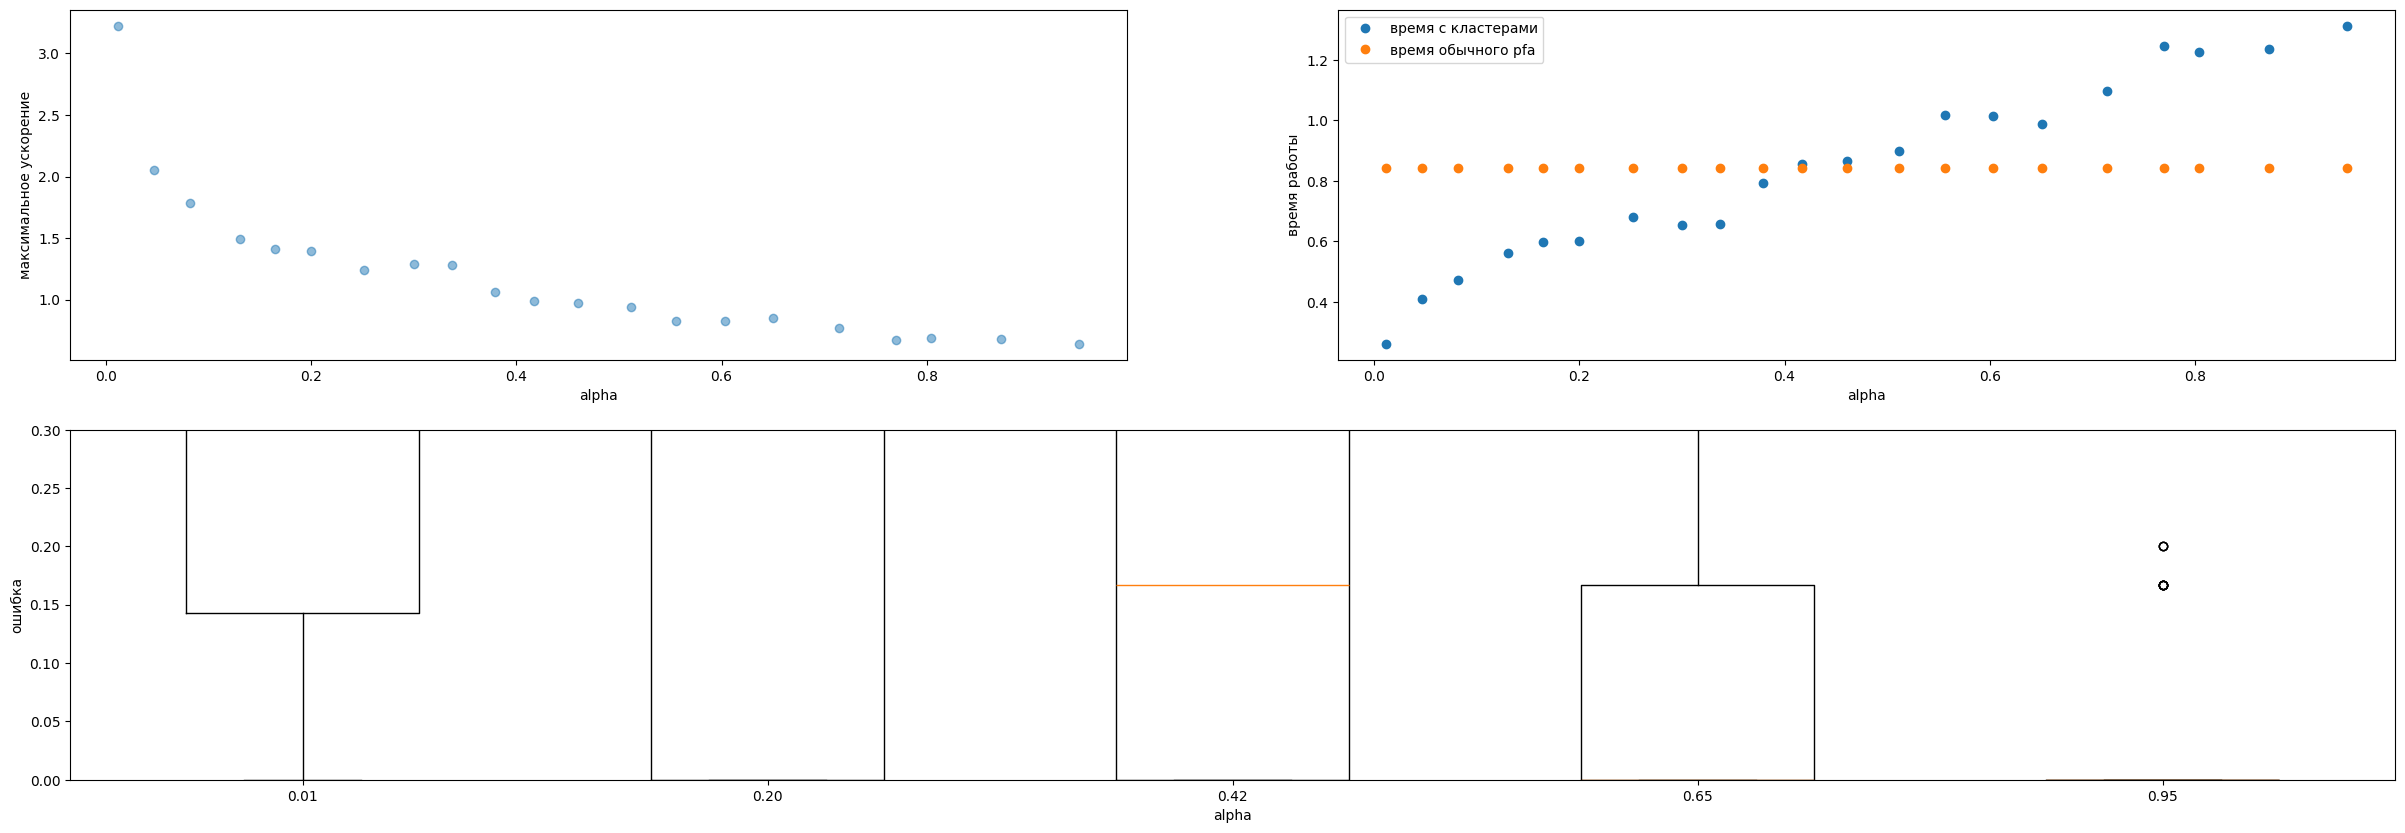

Rand0_2000_0.0051.pkl
[1.3916457098612915, 2.4614617363767697, 1.4607800031110922, 1.1877794109943483, 1.0995094704265853, 0.9684337831876215, 1.0047641988578648, 0.9868129076271175, 1.01606229741639, 0.9586167198208296, 1.0221408227994415, 0.8336613010272061, 0.815335855040995, 0.7911697494805231, 0.9501198171601954, 0.7997852886551644, 0.814419249406622, 0.7839235938840357, 0.7095093591073796, 0.7495090426281807, 0.7144190743564627, 0.7454186792651903, 0.7552234998922491, 0.7687505406166267, 0.6832269135410118]
0.005053526763381691
5
5


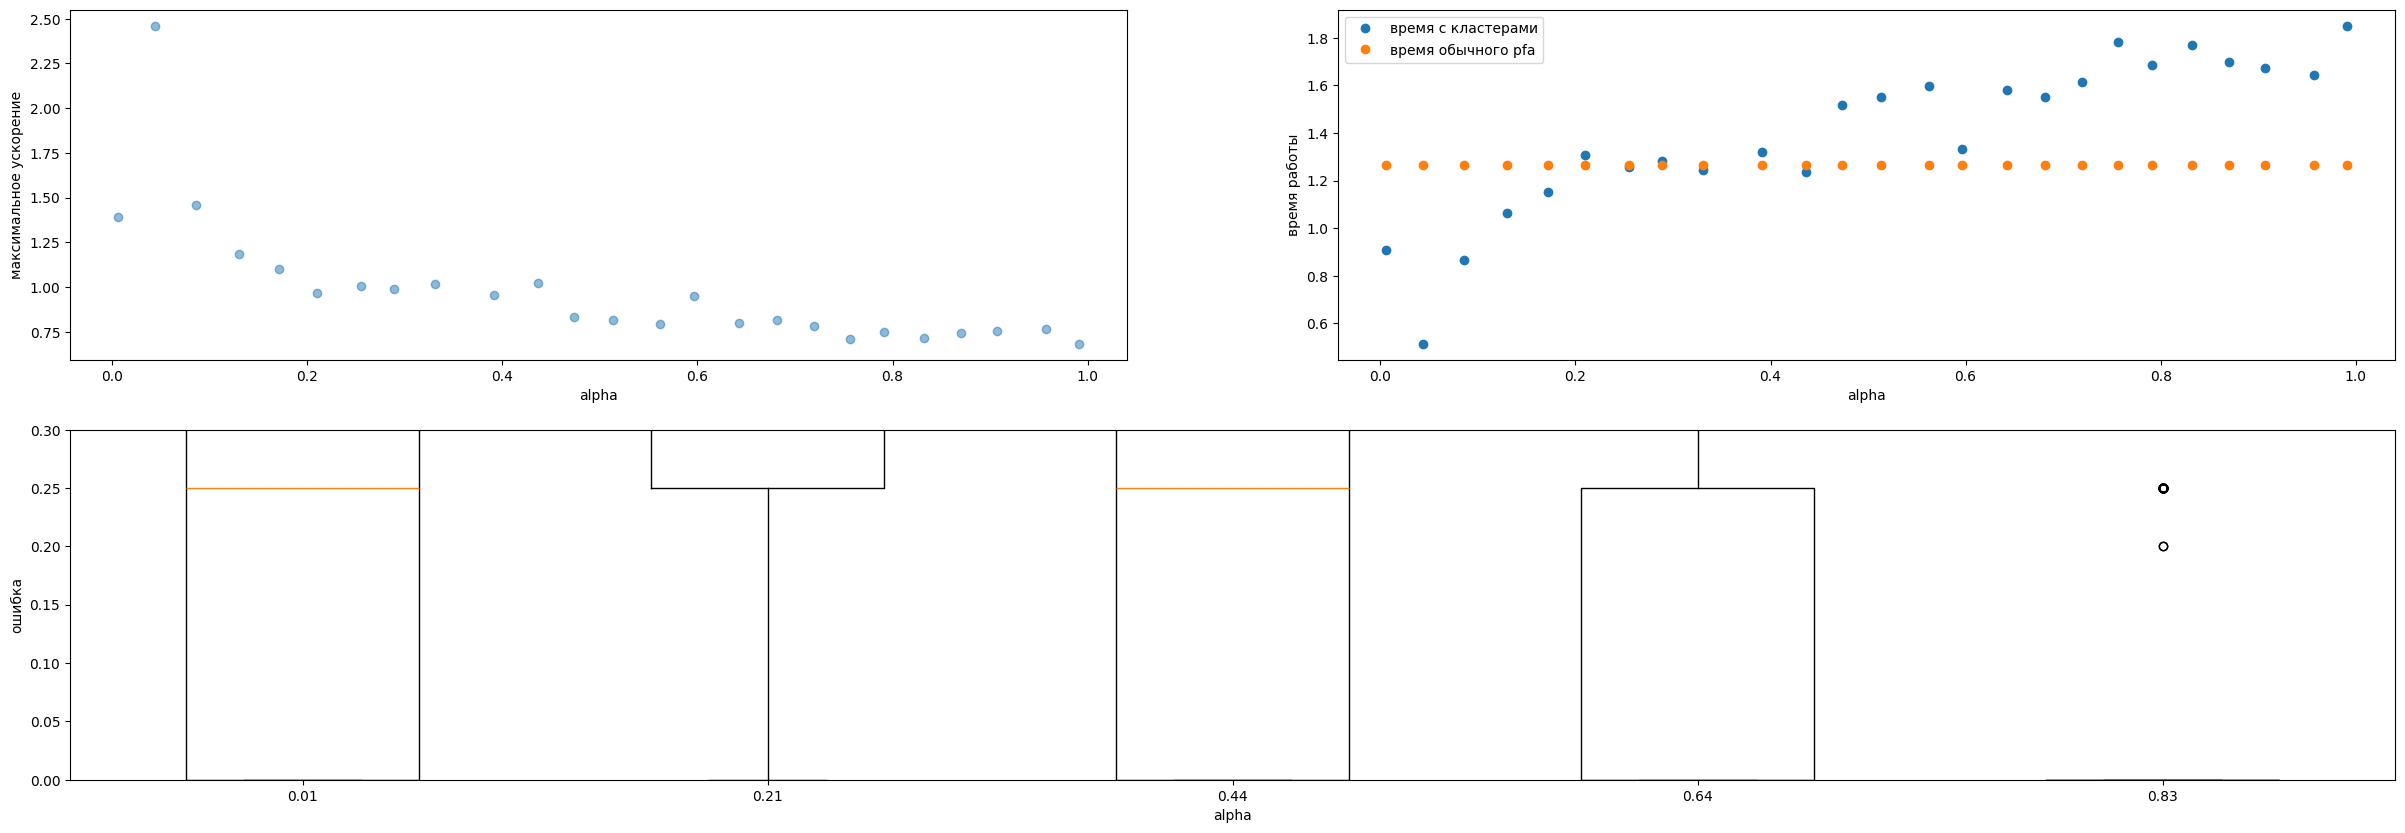

In [20]:
from tqdm import trange

for name in r:
    print(name)
    res : CityResult = r[name]
    
    # d.append(res.density)
    # a.append(res.points_results[0].speed_up[0])
    X = [pr.alpha for pr in res.points_results]
    fig = plt.figure()
    fig.set_figwidth(30)
    fig.set_figheight(10)

    gs = fig.add_gridspec(2,2)
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    ax3 = fig.add_subplot(gs[1, :])
    print([pr.speed_up[0] for pr in res.points_results])
    ax1.errorbar(X, [pr.speed_up[0] for pr in res.points_results] , fmt='o', alpha = 0.5)
    ax1.set(xlabel='alpha', ylabel='максимальное ускорение')
    Y_time =  np.array([pr.absolute_time[0] for pr in res.points_results])
    Y_time_usual =  np.array([pr.speed_up[0] for pr in res.points_results]) * Y_time
    ax2.errorbar(X, Y_time, fmt='o', label = 'время с кластерами')
    ax2.errorbar(X, Y_time_usual, fmt='o', label = 'время обычного pfa')
    ax2.set(xlabel='alpha', ylabel='время работы')
    ax2.legend()

    M = len(X)
    STEP = 5
    label = []
    for i in range(0,M,STEP):
        label.append('{:.2f}'.format(X[i]))
    
    b = res.density
    x = b
    N = res.nodes
    s=b
    sx = b
   
    print(s)
    data = [pr.errors for pr in res.points_results][:M:STEP]

    ax3.set(xlabel='alpha', ylabel='ошибка')
    print(len(data))
    print(len(label))
    ax3.set_ylim([0,0.3])
    ax3.boxplot(data, labels=label)

    fig.patch.set_alpha(1)
    plt.show()

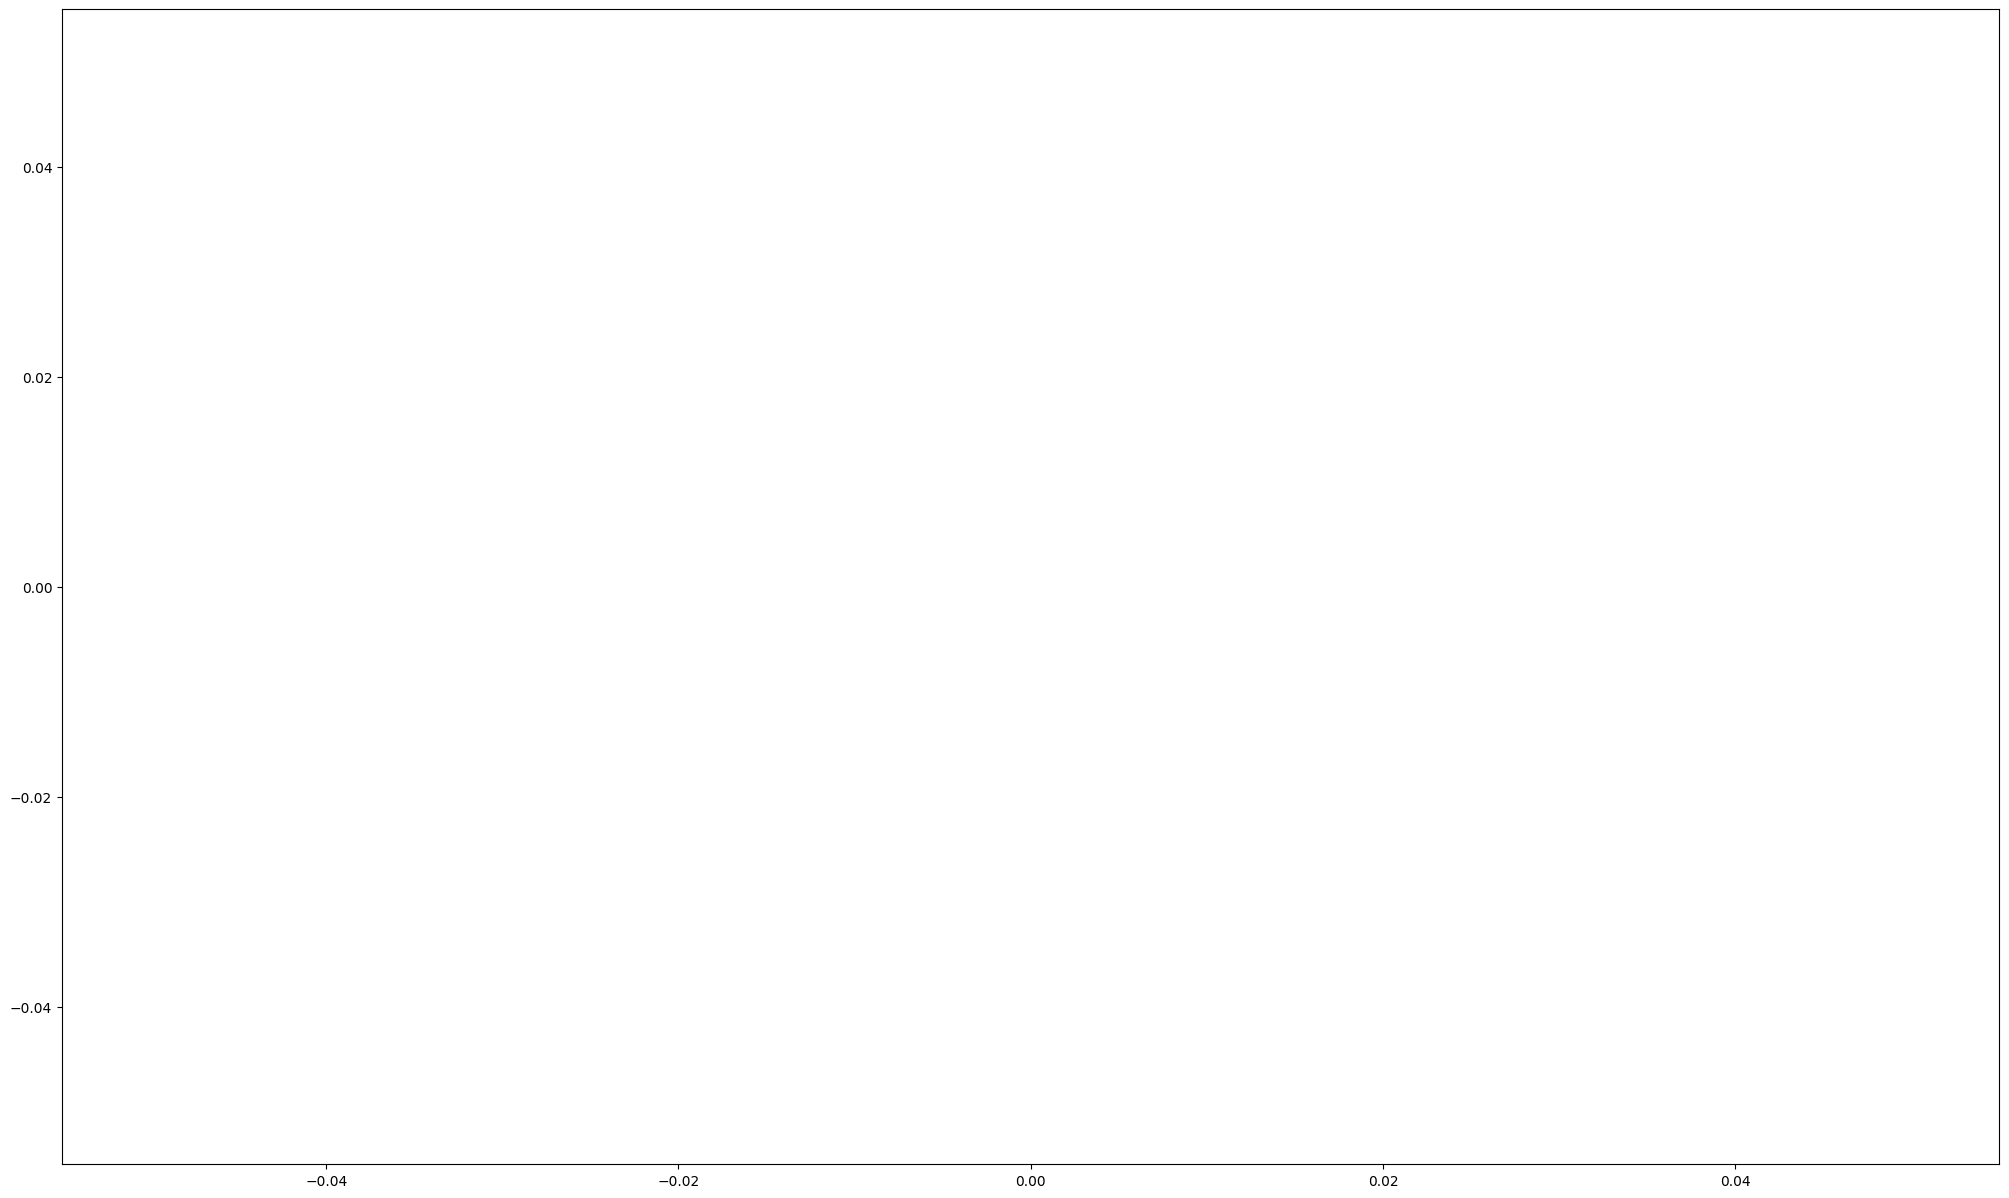

In [6]:
fig, axs = plt.subplots(1, 1)
fig.set_figwidth(25)
fig.set_figheight(15)
axs = [axs]
axs[0].scatter(d,a)
# axs[0].legend()

NameError: name 'data_x' is not defined

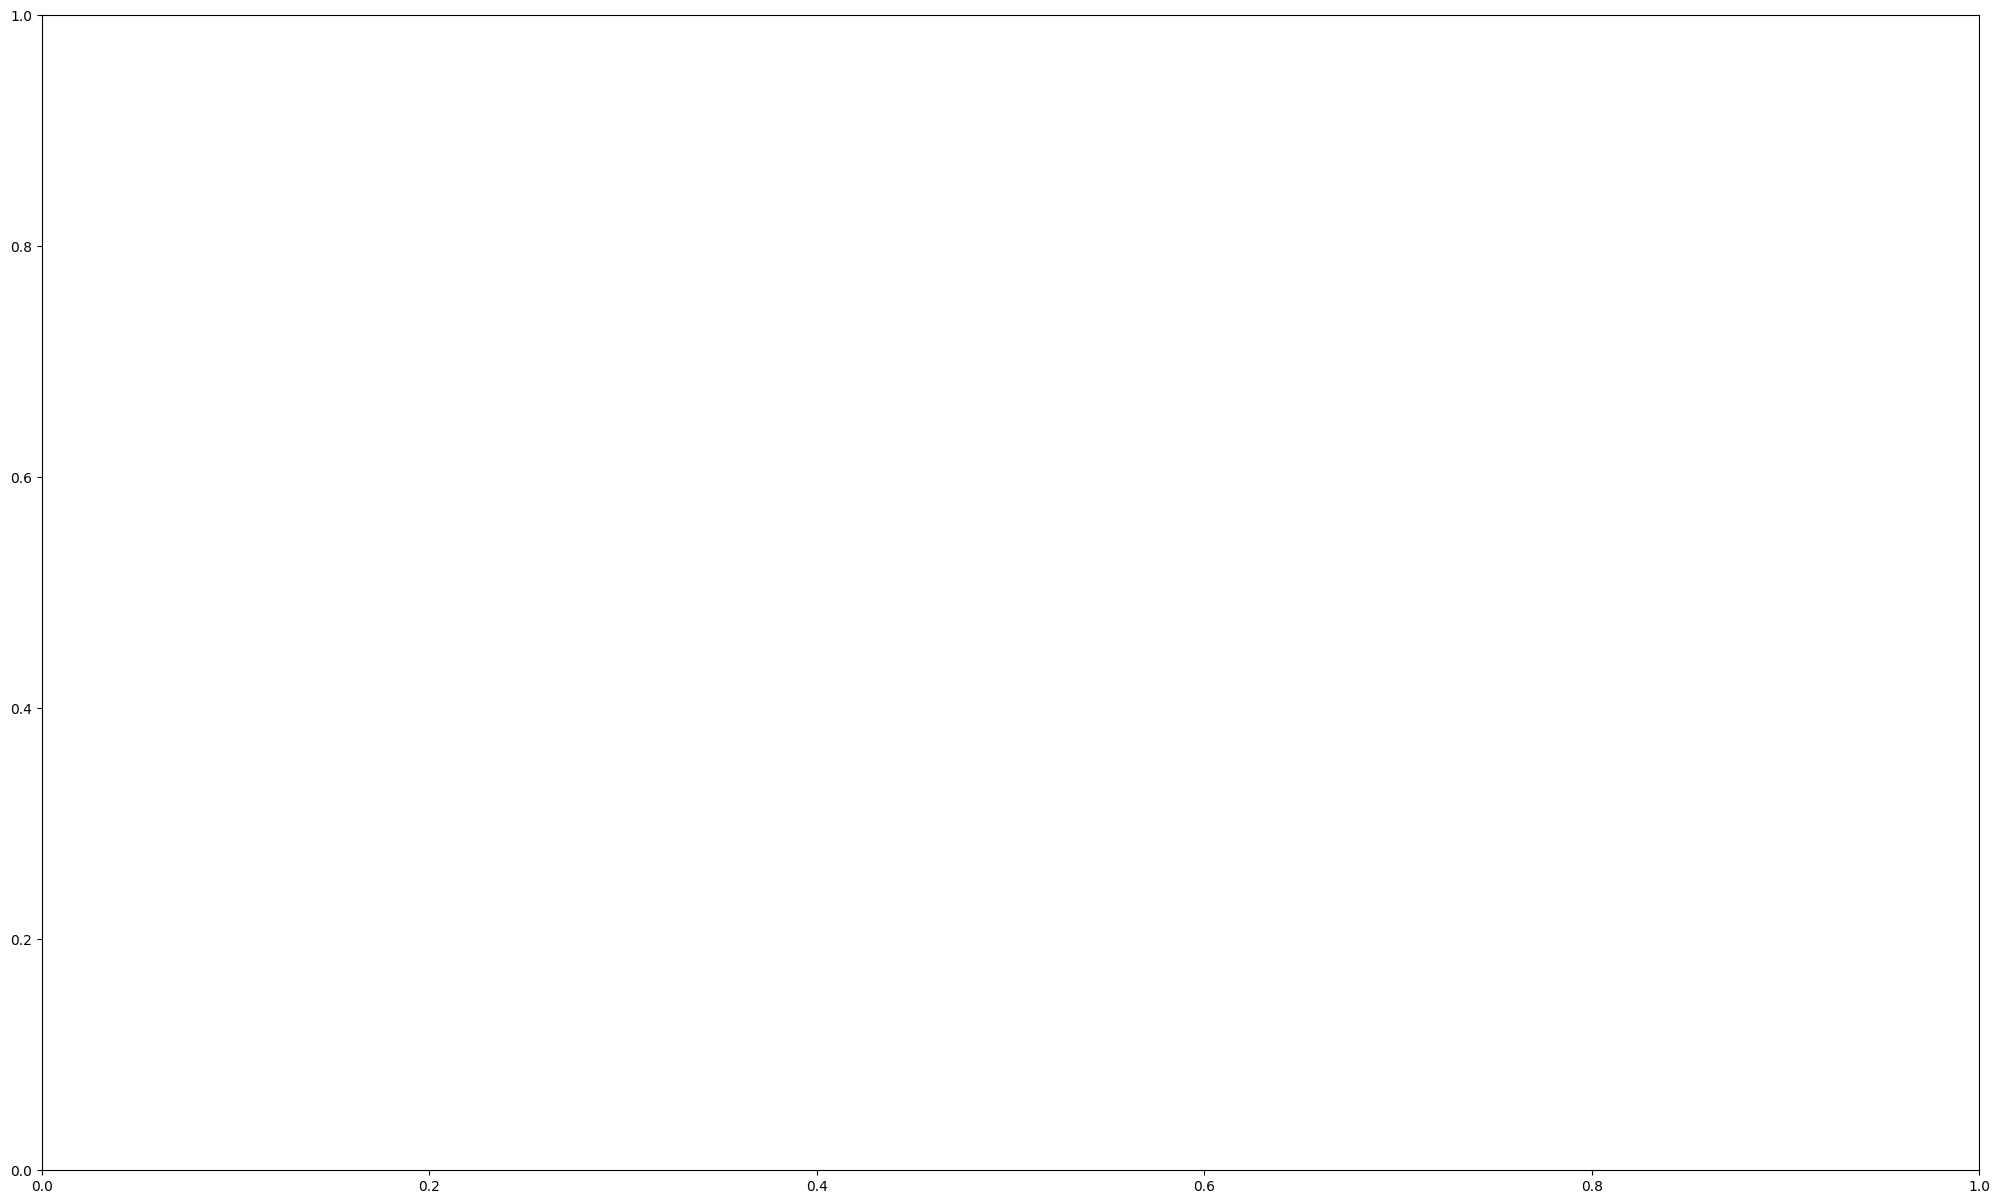

In [7]:
fig, axs = plt.subplots(1, 1)
fig.set_figwidth(25)
fig.set_figheight(15)
axs = [axs]
data_x = list(data_x.items())
data_x.sort(key = lambda x:x[0])
data_x = dict(data_x)
data_y = list(data_y.items())
data_y.sort(key = lambda x:x[0])
data_y = dict(data_y)

for n in data_x:
    xx = np.argsort(data_x[n])
    axs[0].plot(np.array(data_x[n])[xx], np.array(data_y[n])[xx],'--o', label = f'{n}')
axs[0].legend()

plt.rcParams.update({'font.size': 20})
fig.patch.set_alpha(1)
plt.show()

In [ ]:
fig, axs = plt.subplots(1, 1)
fig.set_figwidth(25)
fig.set_figheight(15)
axs = [axs]
data_x = list(data_x.items())
data_x.sort(key = lambda x:x[0])
data_x = dict(data_x)
data_err = list(data_err.items())
data_err.sort(key = lambda x:x[0])
data_err = dict(data_err)

for n in data_x:
    xx = np.argsort(data_x[n])
    axs[0].plot(np.array(data_x[n])[xx], np.array(data_err[n])[xx],'--o', label = f'{n}')
axs[0].legend()

plt.rcParams.update({'font.size': 20})
fig.patch.set_alpha(1)
plt.show()

In [ ]:
for N in [1000,2000,3000,4000,5000,10000,20000,40000,70000,100000]:

    def func(x):
         return 1/(2/np.sqrt(x*N)*(1-np.log(x)/np.log(N)) + x*2/1.5*(1+np.log(x)/np.log(N)) + 1*(1 + 1.5)/(np.sqrt(x*N)*1.5*np.log(N)))

    def x0(a0 = (4/N)**(1/3)):
        a1 = 1/4/1.5/np.log(N) * (1.5 * (2 /3 * 2*np.log(2) - 8 /3*np.log(N) -5) + 4/3 * 2 *(np.log(4) + 2*np.log(N) +3) -1)
        a2 = 1/16/(2)**(2/3)/1.5/np.log(N)/(1/N)**(1/3) * (1.5 * (-4 *np.log(2) +8*np.log(N) +19) + 8 * 2+3)
        # a0 =  (4/N)**(1/3)
        return a0 -a1/2/a2

    def xx0(a0 = (4/N)**(1/3)):
        b1 = 2
        b0 = 1.5
        x = a0
        d1 = (2 *b1* np.sqrt(N)* x**(3/2) *(np.log(N) + np.log(x) + 1) + b0*(-2*np.log(N) + 2* np.log(x) - 5) - 1)/(2* b0*np.sqrt(N)* x**(3/2)*np.log(N))
        d2 = (4 * b1 *np.sqrt(N)* x**(3/2) + b0* (6* np.log(N) - 6*np.log(x) + 19) + 3)/(4* b0 *np.sqrt(N) *x**(5/2)*np.log(N))
        return -d1/2/d2 + x



    x = np.linspace(1/N,1,1000)
    y = func(x)
    print(N,'actual',x[np.argmax(y)],'fitted',xx0(a0=xx0()), 'delta',abs(x[np.argmax(y)] - xx0(a0=xx0(a0=xx0(xx0(a0=xx0(a0=xx0()))))))/x[np.argmax(y)] * 100,'%')

In [ ]:
N = 10000
def func(x0 = (4/N)**(1/3)):
    b1 = 2
    b0 = 1.5
    x = x0
    d1 = (2 *b1* np.sqrt(N)* x**(3/2) *(np.log(N) + np.log(x) + 1) + b0 (-2*np.log(N) + 2* np.log(x) - 5) - 1)/(2* b0*np.sqrt(N)* x**(3/2)*np.log(N))
    d2 = (4 * b1 *np.sqrt(N)* x**(3/2) + b0 (6* np.log(n) - 6*np.log(x) + 19) + 3)/(4* b0 *np.sqrt(N) *x**(5/2)*np.log(N))
    return -d1/2/d2 + x0




In [ ]:
fig, axs = plt.subplots(1, 1)
fig.set_figwidth(25)
fig.set_figheight(7)

axs.set(xlabel='alpha', ylabel='A')
axs.legend()

def f(x):
    return 2/np.sqrt(x*N)*(1-np.log(x)/np.log(N)) + x*2/1.5*(1+np.log(x)/np.log(N)) + 1*(1 + 1.5)/(np.sqrt(x*N)*1.5*np.log(N))

x = np.linspace(min(nodes), max(nodes), 1000)
y = 43.5*f(x)
axs.errorbar(x, y, fmt='o', label = "{}: {}".format(name, r[name].nodes))
axs.errorbar(nodes, alpha_max, fmt='o', label = "{}: {}".format(name, r[name].nodes))


In [ ]:
print(f(10000)*2)
print(f(20000)*2)
print(f(30000)*2)
print(f(40000)*2)
print(f(50000)*2)
print(f(60000)*2)
print(f(70000)*2)


In [ ]:
from common import CentroidResult
data = {'a' : [], 'b': [], 'N': [], 'density': []}
for name in r:
    res: CityResult = r[name]
    X_r = []
    Y_a = []
    for p_r in res.points_results:
        point_res : CentroidResult = p_r
        X_r.append(point_res.resolution)
        Y_a.append(point_res.alpha)

    fig, axs = plt.subplots(1, 1)
    fig.set_figwidth(25)
    fig.set_figheight(7)

    axs.errorbar(X_r, Y_a, fmt='o', label = "{}: {}".format(name, r[name].nodes))
    axs.set(xlabel='resolution', ylabel='alpha')

    popt = curve_fit(func, X_r, Y_a)
    XX = np.linspace(0,10000,10000)
    YY = func(XX, popt[0][0], popt[0][1])
    axs.errorbar(XX, YY)
    print(popt[0][0])
    data['a'].append(popt[0][0])
    data['b'].append(popt[0][1])
    data['N'].append(res.nodes)
    data['density'].append(res.density)

In [ ]:
fig, axs = plt.subplots(1, 3)
fig.set_figwidth(25)
fig.set_figheight(7)

axs[0].errorbar( np.array(data['density']), data['a'], fmt='o')
axs[1].errorbar(np.array(data['density']) * np.array(data['N']) *(np.array(data['N'])-1), data['b'], fmt='o')

axs[2].errorbar(data['b'], data['a'], fmt='o')

x= np.array(data['density']) * np.array(data['N']) *(np.array(data['N'])-1)
popt = curve_fit(func, np.array(data['density']) * np.array(data['N']) *(np.array(data['N'])-1), data['b'],p0=[-2, 0.01])
XX = np.linspace(min(x),max(x),10000)
YY = func(XX, popt[0][0], popt[0][1])
axs[1].errorbar(XX, YY)

print(popt)

# axs.set(xlabel='resolution', ylabel='alpha')


In [ ]:
def theory_func(x,c, g, N = 9574, b0 = 1):
    x = x * c
    q = np.log(x) / np.log(N)
    return g / (x / b0 * (1 + q) + c / (np.sqrt(x * N)) * (1 - q))

In [ ]:
X_a = {}
Y_err = {}
Y_err_std = {}

Y_speedup = {}

for name in r:
    result: CityResult = r[name]
    X_a[name] = [a.alpha for a in result.points_results]
    Y_err[name] = [np.mean(a.errors) for a in result.points_results]
    Y_err_std[name] = [np.std(a.errors) for a in result.points_results]
    Y_speedup[name] = [np.mean(a.speed_up) for a in result.points_results]

Графики:

In [ ]:
city_to_n = {}
X_max = {}
Y_speedup_max = {}
Y_err_speedup = {}

c = {}
b = {}
for name in r:
    fig, axs = plt.subplots(1, 3)
    fig.set_figwidth(25)
    fig.set_figheight(7)

    axs[0].errorbar(X_a[name], Y_speedup[name], fmt='o', label = "{}: {}".format(name, r[name].nodes))
    axs[0].set(xlabel='alpha'+ str(r[name].density), ylabel='ускорение')

    func_r = partial(theory_func, N=r[name].nodes, b0=r[name].edges/r[name].nodes)
    print(str(r[name].nodes) + ' ' + str(r[name].edges/r[name].nodes))
    print(str(r[name].nodes) + ' ' + str(2*r[name].edges/(r[name].nodes * (r[name].nodes-1))))

    _x = np.array(X_a[name])
    _x = _x[_x < 0.6]
    _xx = np.linspace(min(_x), max(_x), 100)


    _y = np.array(Y_speedup[name])[0:len(_x)]
    popt = curve_fit(func_r, _x, _y, p0=[0.0003, 4],bounds=(0,[10,1000]))
    # if 'ASHA' in name:
    #     func_target = partial(theory_func, c=0.00005, g=25,N=r[name].nodes, b0=r[name].density)
    # else:
    func_target = partial(theory_func, c=popt[0][0], g=popt[0][1],N=r[name].nodes, b0=r[name].edges/r[name].nodes)
    a = scipy.optimize.fminbound(lambda x: -func_target(x), 0, 0.5)
    city_to_n[name] = r[name].nodes
    X_max[name] = a
    Y_speedup_max[name] = func_target(a)

    c[name] = popt[0][0]
    b[name] = popt[0][1]

    _y = func_target(np.array(_xx))
    axs[0].errorbar(_xx, _y, linewidth=3, label = "c:{}\n g:{}".format(popt[0][0],popt[0][1]))
    axs[0].legend()
    axs[1].errorbar(X_a[name], Y_err[name], fmt='o')
    axs[1].set(xlabel='alpha' + str(r[name].density), ylabel='средняя относительная ошибка')
    z = np.polyfit(X_a[name], Y_err[name], 6)
    p = np.poly1d(z)
    axs[1].errorbar(_xx, p(_xx), fmt='o')
    Y_err_speedup[name] = p(a)



    axs[2].errorbar(X_a[name], Y_err_std[name], fmt='o')
    axs[2].set(xlabel='alpha'+ str(r[name].density), ylabel='погрешность ошибки')

    # file_name = generate_new_name(name + '.png', 'plots')

    # plt.savefig(file_name)

Построим график ускорения от плотности

In [ ]:
# X_max = {}
# Y_speedup_max = {}
# Y_err_speedup = {}

def t_f(x, N, b):
    return

fig, axs = plt.subplots(1, 5)
fig.set_figwidth(30)
fig.set_figheight(7)


X_betta = [city_to_n[name] for name in city_to_n]
Y_betta_speedup =[Y_speedup_max[n] for n in Y_speedup_max]
Y_betta_err =[Y_err_speedup[n] for n in Y_err_speedup]

Y_c = [c[name] for name in c]
Y_b = [b[name] for name in b]

axs[0].errorbar(X_betta, Y_betta_speedup, fmt='o')
axs[0].set(xlabel='плотность', ylabel='максимальное ускорение')


axs[1].errorbar(X_betta, Y_betta_err, fmt='o')
axs[1].set(xlabel='плотность', ylabel='относительная ошибка при максимаольном кскорении')



axs[2].errorbar(X_betta, Y_c, fmt='o')
axs[2].set(xlabel='плотность', ylabel='c')
X_betta = [r[n].density for n in r]

axs[3].errorbar(X_betta, Y_b, fmt='o')
axs[3].set(xlabel='плотность', ylabel='b')


axs[4].errorbar(X_betta, [X_max[name] for name in X_max], fmt='o')
axs[4].set(xlabel='плотность', ylabel='alpha')

plt.show()

In [ ]:
def line(x, a,b):
    return a*x + b

def line_predict(x, a,b,alpha, N):
    # print("a:{:.2f} n:{:.2f}".format(alpha, N))
    return a*x/(alpha * (1 + np.log(alpha)/np.log(N))) + b

def inverse(x,a,b,c):
    return a*(x**c) + b

Уберем последние 4 точки

In [ ]:
# X_max = {}
# Y_speedup_max = {}
# Y_err_speedup = {}

fig, axs = plt.subplots(1, 2)
fig.set_figwidth(25)
fig.set_figheight(7)

X_max_1 = dict(list(X_max.items())[0:-5])
X_betta = [r[n].density for n in r][0:-5]
Y_betta_speedup =[Y_speedup_max[n] for n in Y_speedup_max][0:-5]
Y_betta_err =[Y_err_speedup[n] for n in Y_err_speedup][0:-5]

axs[0].errorbar(X_betta, Y_betta_speedup, fmt='o')
axs[0].set(xlabel='плотность', ylabel='максимальное ускорение')
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(X_betta,Y_betta_speedup)

_x = np.linspace(min(X_betta), max(X_betta))
_y = slope * _x + intercept
axs[0].errorbar(_x, _y,label = '{:.2f}x + {:.2f}. R2:{:.4f}'.format(slope,intercept, r_value**2))
axs[0].legend()


# _x = X_betta
# f = partial(line_predict, N = [r[name].nodes for name in r][0])
# _y = []
# for i,a in enumerate(X_max_1):
#     _y.append(f(_x[i], slope/15, intercept, X_max_1[a]))
#
# axs[0].errorbar(_x, _y, fmt = 'o')
# axs[0].legend()



axs[1].errorbar(X_betta, Y_betta_err, fmt='o')
axs[1].set(xlabel='плотность', ylabel='относительная ошибка при максимаольном кскорении')

popt = curve_fit(inverse, X_betta, Y_betta_err, p0=[0.000000015, -1.5,0.06])
_xx = np.linspace(min(X_betta), max(X_betta), 300)
_yy = inverse(_xx, *popt[0])
axs[1].errorbar(_xx, _yy,label = '{:.10f}x^(-2) + {:.4f}'.format(popt[0][0],popt[0][1]))
axs[1].legend()
plt.show()

In [ ]:
from graph_generator import get_graph

H = get_graph('R2555133')


In [ ]:
def _f(x, N):
    q = np.log(x) / np.log(N)
    return 1 / (x * (1 + q) + 1 / (np.sqrt(x * N)) * (1 - q))

for name in r:
    fig, axs = plt.subplots(1, 3)
    fig.set_figwidth(25)
    fig.set_figheight(7)

    axs[0].errorbar(X_a[name], Y_speedup[name], fmt='o', label = "{}: {}".format(name, r[name].nodes))
    axs[0].set(xlabel='alpha'+ str(r[name].density), ylabel='ускорение')

    # func_r = partial(theory_func, N=r[name].nodes, b0=r[name].edges/r[name].nodes)
    # print(str(r[name].nodes) + ' ' + str(r[name].edges/r[name].nodes))
    # print(str(r[name].nodes) + ' ' + str(2*r[name].edges/(r[name].nodes * (r[name].nodes-1))))

    _x = np.array(X_a[name])
    _x = _x[_x < 0.6]
    _xx = np.linspace(min(_x), max(_x), 100)

    func_target = partial(_f, N=r[name].nodes)
    _y = func_target(np.array(_xx))
    axs[0].errorbar(_xx, _y, linewidth=3)
    axs[0].legend()
    # axs[1].errorbar(X_a[name], Y_err[name], fmt='o')
    # axs[1].set(xlabel='alpha' + str(r[name].density), ylabel='средняя относительная ошибка')
    # z = np.polyfit(X_a[name], Y_err[name], 6)
    # p = np.poly1d(z)
    # axs[1].errorbar(_xx, p(_xx), fmt='o')
    # Y_err_speedup[name] = p(a)
    #
    #
    #
    # axs[2].errorbar(X_a[name], Y_err_std[name], fmt='o')
    # axs[2].set(xlabel='alpha'+ str(r[name].density), ylabel='погрешность ошибки')

    # file_name = generate_new_name(name + '.png', 'plots')

    # plt.savefig(file_name)

In [ ]:
def _f(x, N):
    q = np.log(x) / np.log(N)
    return 1 / (x * (1 + q) + 1 / (2*np.sqrt(x * N)) * (1 - q))

arr_N = [i for i in range(10000, 100000,100)]
y = []
for i in arr_N:
    func_target = partial(_f, N=i)
    a = scipy.optimize.fminbound(lambda x: -func_target(x), 0, 1)
    y.append(func_target(a))

fig, axs = plt.subplots(1, 1)
fig.set_figwidth(25)
fig.set_figheight(7)

axs.errorbar(arr_N, y, linewidth=3,label='a')
axs.errorbar(arr_N, (np.array(arr_N)) ** 0.317 -1.5, linewidth=3, label = 'b')
axs.legend()
